<div>First analytics</div>

In [7]:
import os
from collections import Counter
base_path = 'ICBHI_final_database/'
items = os.listdir(base_path)
print(items[:20])  # Show first 20 items to see if they're files or directories



['101_1b1_Al_sc_Meditron.txt', '101_1b1_Al_sc_Meditron.wav', '101_1b1_Pr_sc_Meditron.txt', '101_1b1_Pr_sc_Meditron.wav', '102_1b1_Ar_sc_Meditron.txt', '102_1b1_Ar_sc_Meditron.wav', '103_2b2_Ar_mc_LittC2SE.txt', '103_2b2_Ar_mc_LittC2SE.wav', '104_1b1_Al_sc_Litt3200.txt', '104_1b1_Al_sc_Litt3200.wav', '104_1b1_Ar_sc_Litt3200.txt', '104_1b1_Ar_sc_Litt3200.wav', '104_1b1_Ll_sc_Litt3200.txt', '104_1b1_Ll_sc_Litt3200.wav', '104_1b1_Lr_sc_Litt3200.txt', '104_1b1_Lr_sc_Litt3200.wav', '104_1b1_Pl_sc_Litt3200.txt', '104_1b1_Pl_sc_Litt3200.wav', '104_1b1_Pr_sc_Litt3200.txt', '104_1b1_Pr_sc_Litt3200.wav']


In [ ]:
%pip install librosa matplotlib seaborn pandas numpy scipy pydub jupyter notebook

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

file_path = 'ICBHI_final_database/104_1b1_Al_sc_Litt3200.wav'
y, sr = librosa.load(file_path, sr=None)  # y is the audio time series, sr is the sampling rate


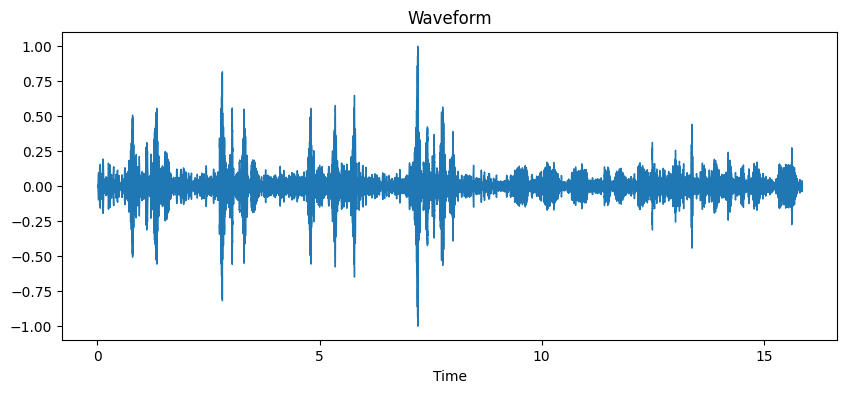

In [10]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()


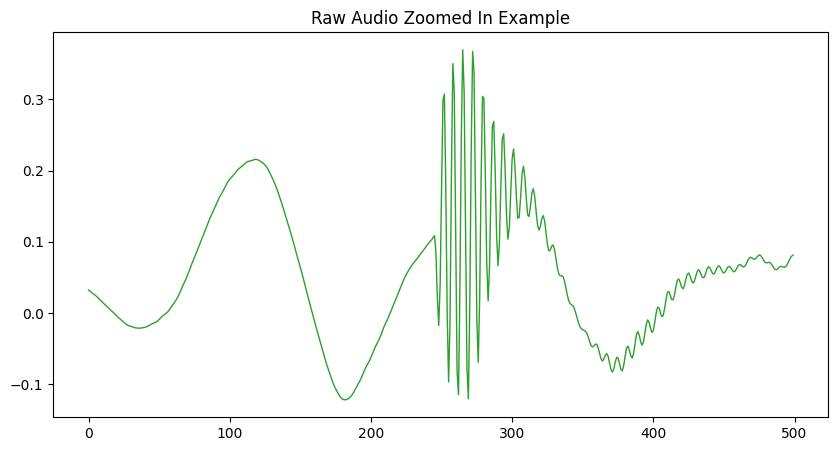

In [ ]:
import pandas as pd
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

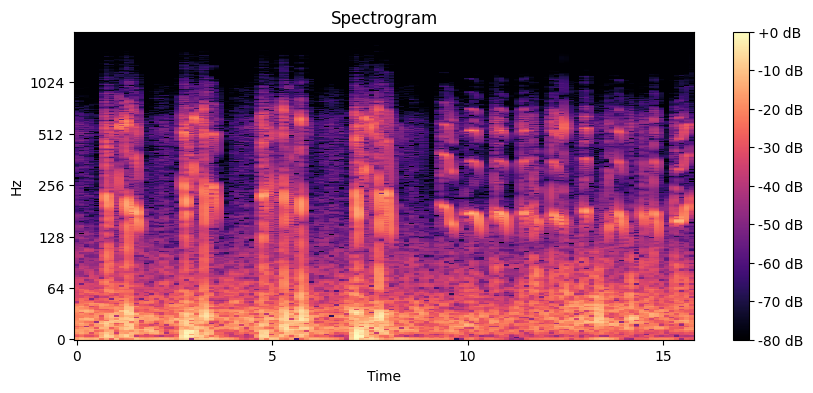

In [12]:
import numpy as np

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


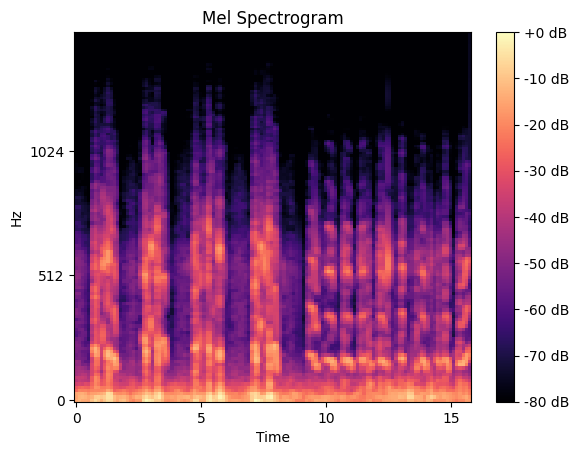

In [13]:
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


In [14]:

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    features = {
        "zcr": np.mean(librosa.feature.zero_crossing_rate(y)),
        "rmse": np.mean(librosa.feature.rms(y=y)),
        "spectral_centroid": np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        "mfcc1": np.mean(librosa.feature.mfcc(y=y, sr=sr)[0]),
        "mfcc2": np.mean(librosa.feature.mfcc(y=y, sr=sr)[1])
    }
    return features

base_path = 'ICBHI_final_database/'
files = [
    f for f in os.listdir(base_path) 
    if os.path.isfile(os.path.join(base_path, f)) and f.endswith('.wav')  # or '.txt'
]

all_data = []

for file in files:
    file_path = os.path.join(base_path, file)
    try:
        feats = extract_features(file_path)
        
        # Example: label is the first 3 digits
        # If your labeling scheme is different, adjust accordingly
        label = file.split('_')[0]
        
        feats["label"] = label
        all_data.append(feats)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        continue

df = pd.DataFrame(all_data)
print(df.head())


        zcr      rmse  spectral_centroid       mfcc1       mfcc2 label
0  0.001192  0.053982         291.511393 -536.597229   80.337196   101
1  0.001184  0.033046         398.452034 -599.051575   81.443336   101
2  0.001393  0.021396         479.680354 -609.898743   95.075272   102
3  0.000636  0.245882         303.540148 -429.030975   59.045887   103
4  0.036546  0.075943         160.261320 -322.799377  193.387131   104


In [ ]:
import seaborn as sns
sns.pairplot(df, hue="label")

In [ ]:
import seaborn as sns

base_path = 'ICBHI_final_database/'
# Assuming your audio files are .wav (adjust if needed)
files = [f for f in os.listdir(base_path) if os.path.isfile(os.path.join(base_path, f)) and f.endswith('.wav')]

data = []  # to store file, duration, and label info
for f in files:
    file_path = os.path.join(base_path, f)
    try:
        y, sr = librosa.load(file_path, sr=None)
        # Calculate audio duration in seconds
        duration = len(y) / sr
        # Extract label from filename (adjust logic according to your naming convention)
        label = f.split('_')[0]
        data.append({'file': f, 'duration': duration, 'label': label})
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

dataFrame = pd.DataFrame(data)
print(dataFrame.head())

                         file  duration label
0  101_1b1_Al_sc_Meditron.wav    20.000   101
1  101_1b1_Pr_sc_Meditron.wav    20.000   101
2  102_1b1_Ar_sc_Meditron.wav    20.000   102
3  103_2b2_Ar_mc_LittC2SE.wav    20.000   103
4  104_1b1_Al_sc_Litt3200.wav    15.856   104


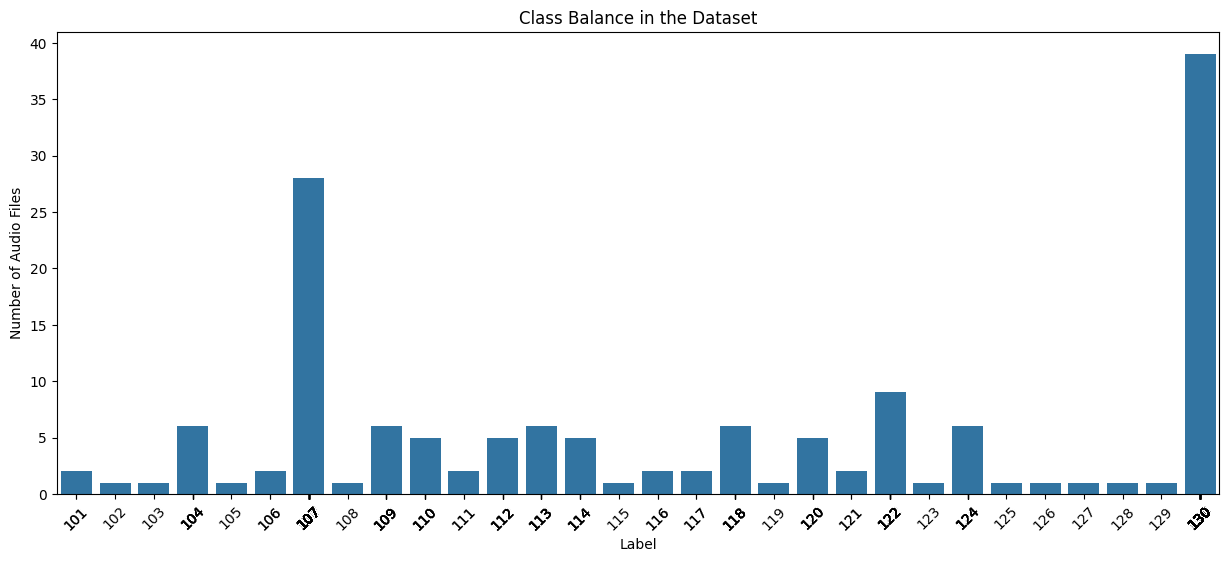

In [ ]:
#Plotting class balance
plt.figure(figsize=(15, 6))
sns.countplot(x='label', data=dataFrame[:150])
plt.title("Class Balance in the Dataset")
# Set x-axis tick labels to show each year below the corresponding bar.
plt.xticks(ticks=dataFrame.label[:150], labels=dataFrame.label[:150], rotation=45)
plt.xlabel("Label")
plt.ylabel("Number of Audio Files")
plt.show()

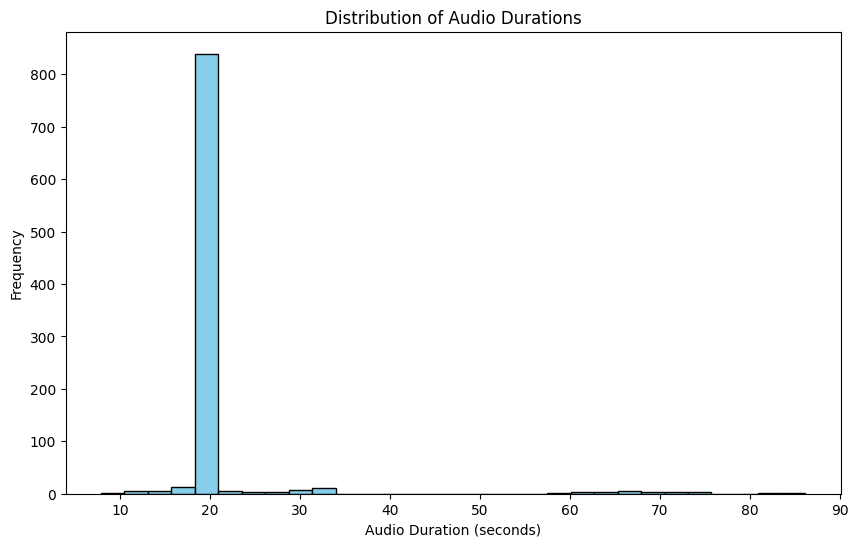

In [21]:
#Examine audio duration
plt.figure(figsize=(10, 6))
plt.hist(dataFrame['duration'], bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Audio Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio Durations')
plt.show()


In [ ]:
print(dataFrame['duration'].describe())

count    920.000000
mean      21.492424
std        8.307421
min        7.856000
25%       20.000000
50%       20.000000
75%       20.000000
max       86.200000
Name: duration, dtype: float64


In [ ]:
mean_duration = dataFrame['duration'].mean()
std_duration = dataFrame['duration'].std()
# Define an outlier as a clip with a duration 2 standard deviations away from the mean
outliers = dataFrame[(dataFrame['duration'] > mean_duration + 2*std_duration) | (dataFrame['duration'] < mean_duration - 2*std_duration)]
print("Outlier files based on duration:", outliers)

Outlier files based on duration:                            file  duration label
48   110_1b1_Pr_sc_Meditron.wav     71.45   110
52   110_1p1_Pr_sc_Meditron.wav     75.25   110
55   112_1b1_Ar_sc_Meditron.wav     67.85   112
83   120_1b1_Al_sc_Meditron.wav     66.75   120
84   120_1b1_Ar_sc_Meditron.wav     66.75   120
85   120_1b1_Lr_sc_Meditron.wav     86.20   120
86   120_1b1_Pl_sc_Meditron.wav     67.40   120
87   120_1b1_Pr_sc_Meditron.wav     67.40   120
379  157_1b1_Al_sc_Meditron.wav     65.05   157
380  157_1b1_Ar_sc_Meditron.wav     65.05   157
381  157_1b1_Lr_sc_Meditron.wav     66.50   157
382  157_1b1_Pl_sc_Meditron.wav     63.10   157
383  157_1b1_Pr_sc_Meditron.wav     63.10   157
478  166_1p1_Al_sc_Meditron.wav     62.05   166
479  166_1p1_Ar_sc_Meditron.wav     62.05   166
480  166_1p1_Ll_sc_Meditron.wav     57.80   166
481  166_1p1_Pl_sc_Meditron.wav     62.50   166
482  166_1p1_Pr_sc_Meditron.wav     62.50   166
878  218_1b1_Al_sc_Meditron.wav     71.05   218
879  21

#Diagnosis

In [33]:
data = pd.read_csv("diagnosis_data.csv")
data.head()

,id,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


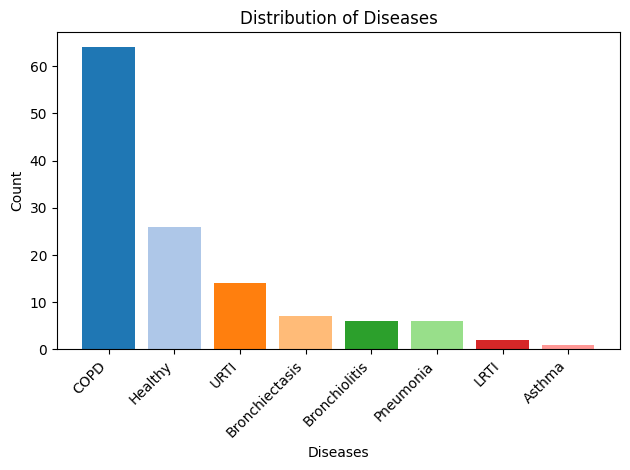

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
diagnosis_counts = data['diagnosis'].value_counts()
colors = plt.cm.tab20.colors  # A colormap with 20 distinct colors

# Create bar chart
fig, ax = plt.subplots()
bars = ax.bar(diagnosis_counts.index, diagnosis_counts.values, color=colors[:len(diagnosis_counts)])

# Customize chart
ax.set_title("Distribution of Diseases")
ax.set_xlabel("Diseases")
ax.set_ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


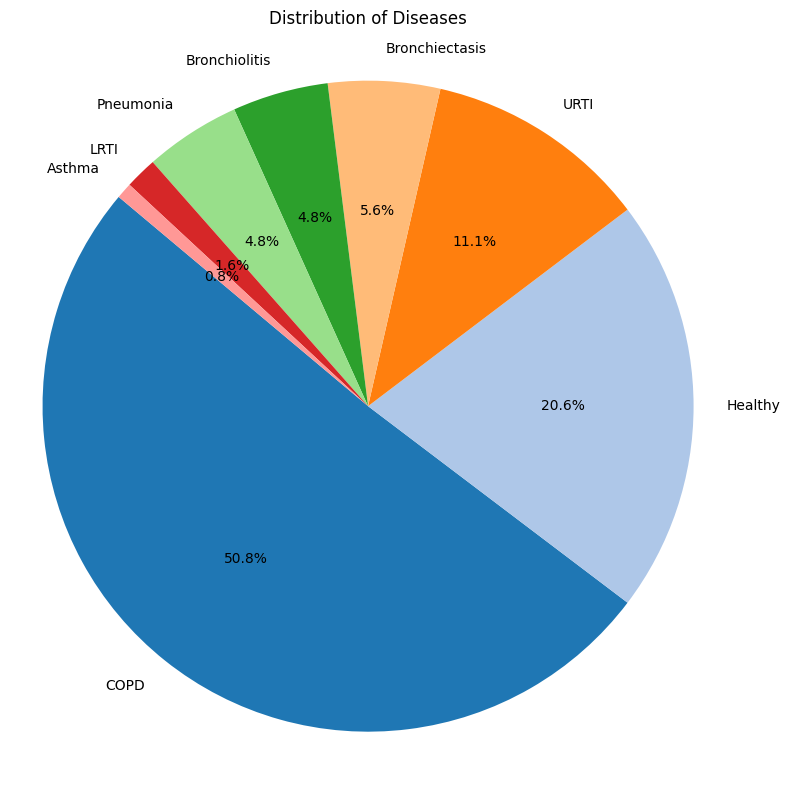

In [43]:
import matplotlib.pyplot as plt

# Sample data
diagnosis_counts = data['diagnosis'].value_counts()
colors = plt.cm.tab20.colors  # Ensure the number of colors matches the number of categories

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts.values, labels=diagnosis_counts.index, colors=colors[:len(diagnosis_counts)],
        autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Diseases")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
